<a href="https://colab.research.google.com/github/Samridhi-Aggarwaal/EDA/blob/main/Theory_DA_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THEORY DIGITAL ASSIGNMENT**

*Samridhi [21BCE3242]*




---
---



**GituHub Link:** [link text](https://github.com/Samridhi-Aggarwaal/EDA)

In [ ]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

*01. Load the dataset and print the head and tail of the dataset*

In [ ]:
# Loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/countymurders.csv')

# Display the first few rows of the dataset
print("Head of the dataset: ")
print(data.head(3))
print("\n\nTail of the dataset: ")
print(data.tail(3))

Head of the dataset: 
   rownames  arrests  countyid  density  popul  perc1019  perc2029  percblack  \
0         1      2.0      1001    54.05  32216     20.63     15.28      22.33   
1         2      3.0      1001    53.66  31984     20.19     15.55      22.07   
2         3      2.0      1001    53.75  32036     19.66     15.73      21.80   

   percmale  rpcincmaint  ...  rpcunemins  year  murders  murdrate  \
0     40.25       167.67  ...       29.16  1980        2  0.620810   
1     40.36       167.99  ...       43.92  1981        1  0.312656   
2     40.42       166.63  ...       71.41  1982        3  0.936446   

   arrestrate  statefips  countyfips  execs    lpopul  execrate  
0    0.620810          1           1      0  10.38022       0.0  
1    0.937969          1           1      0  10.37299       0.0  
2    0.624298          1           1      0  10.37462       0.0  

[3 rows x 21 columns]


Tail of the dataset: 
       rownames  arrests  countyid   density  popul  perc1019



---



*02. Description of the dataset*

In [ ]:
# Dataset description
data['murders'].value_counts()

,count
murders,
0,15651
1,6637
2,3898
3,2286
4,1603
...,...
1348,1
1416,1
1500,1


In [ ]:
print("Dataset description")
data.describe()

Dataset description


,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
count,37349.000000,36845.000000,37349.000000,37349.000000,3.734900e+04,37349.000000,37349.000000,37349.000000,37349.000000,37346.000000,...,37346.000000,37349.000000,37349.000000,37349.000000,36845.000000,37349.000000,37349.000000,37349.000000,37349.000000,37349.000000
mean,18675.000000,6.782250,32921.927173,252.241067,8.934354e+04,15.582640,14.584615,7.823194,43.350958,165.450844,...,70.557953,1988.000000,7.286915,0.508202,0.511486,32.821575,100.352299,0.006854,10.347289,0.001042
std,10781.871939,50.128657,15528.352966,1663.768484,2.718545e+05,1.973399,3.696407,13.287067,3.717612,97.488961,...,52.909393,4.899045,47.217586,0.851044,1.232562,15.503684,107.942699,0.112448,1.327145,0.029068
min,1.000000,0.000000,1001.000000,0.050000,8.500000e+01,7.080000,5.617244,0.000000,35.150000,5.490000,...,0.000000,1980.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.442651,0.000000
25%,9338.000000,0.000000,20105.000000,17.681580,1.314400e+04,14.320000,12.301700,0.200000,40.900000,96.250000,...,35.200000,1984.000000,0.000000,0.000000,0.000000,20.000000,33.000000,0.000000,9.483721,0.000000
50%,18675.000000,1.000000,36065.000000,44.240000,2.879200e+04,15.420000,14.270000,1.450000,41.810000,145.147500,...,57.100000,1988.000000,1.000000,0.241044,0.163677,36.000000,75.000000,0.000000,10.267850,0.000000
75%,28012.000000,3.000000,48049.000000,106.600000,6.648000e+04,16.730000,16.200000,8.740000,45.870000,209.880000,...,89.958000,1992.000000,3.000000,0.735294,0.701715,48.000000,127.000000,0.000000,11.104660,0.000000
max,37349.000000,2391.000000,56045.000000,54058.770000,9.127751e+06,30.484580,40.520000,86.279340,78.040000,1306.496000,...,642.730000,1996.000000,1944.000000,39.840640,148.658400,56.000000,840.000000,7.000000,16.026830,2.388916


In [ ]:
stacked = data.stack()
stacked

0      rownames          1.00000
       arrests           2.00000
       countyid       1001.00000
       density          54.05000
       popul         32216.00000
                        ...     
37348  statefips        56.00000
       countyfips       45.00000
       execs             0.00000
       lpopul            8.78783
       execrate          0.00000
Length: 783312, dtype: float64

In [ ]:
stacked.unstack()

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,1.0,2.0,1001.0,54.050000,32216.0,20.63000,15.280000,22.330000,40.25000,167.670,...,29.160,1980.0,2.0,0.620810,0.620810,1.0,1.0,0.0,10.380220,0.0
1,2.0,3.0,1001.0,53.660000,31984.0,20.19000,15.550000,22.070000,40.36000,167.990,...,43.920,1981.0,1.0,0.312656,0.937969,1.0,1.0,0.0,10.372990,0.0
2,3.0,2.0,1001.0,53.750000,32036.0,19.66000,15.730000,21.800000,40.42000,166.630,...,71.410,1982.0,3.0,0.936446,0.624298,1.0,1.0,0.0,10.374620,0.0
3,4.0,7.0,1001.0,53.780000,32056.0,19.10000,15.880000,21.530000,40.47000,176.530,...,72.220,1983.0,7.0,2.183679,2.183679,1.0,1.0,0.0,10.375240,0.0
4,5.0,3.0,1001.0,53.910000,32128.0,18.54000,15.920000,21.260000,40.51000,166.250,...,40.360,1984.0,2.0,0.622510,0.933765,1.0,1.0,0.0,10.377480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,37345.0,0.0,56045.0,2.680000,6430.0,16.35000,10.260000,0.060000,42.67000,95.540,...,54.190,1992.0,0.0,0.000000,0.000000,56.0,45.0,0.0,8.768730,0.0
37345,37346.0,1.0,56045.0,2.708031,6493.0,16.67950,9.610350,0.077006,50.13091,107.260,...,42.904,1993.0,0.0,0.000000,1.540120,56.0,45.0,0.0,8.778480,0.0
37346,37347.0,0.0,56045.0,2.736391,6561.0,16.79622,9.510745,0.030483,50.16004,98.550,...,39.150,1994.0,0.0,0.000000,0.000000,56.0,45.0,0.0,8.788898,0.0
37347,37348.0,0.0,56045.0,2.730135,6546.0,17.01803,9.563092,0.076383,50.18332,106.928,...,38.048,1995.0,0.0,0.000000,0.000000,56.0,45.0,0.0,8.786610,0.0


In [ ]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


header_names = data.columns.tolist()
print("\nAttribute names: ", header_names)

Number of rows: 37349
Number of columns: 21

Attribute names:  ['rownames', 'arrests', 'countyid', 'density', 'popul', 'perc1019', 'perc2029', 'percblack', 'percmale', 'rpcincmaint', 'rpcpersinc', 'rpcunemins', 'year', 'murders', 'murdrate', 'arrestrate', 'statefips', 'countyfips', 'execs', 'lpopul', 'execrate']


In [ ]:
data_structure = data.dtypes
print("Structure of the dataset (Data types):\n", data_structure)

Structure of the dataset (Data types):
 rownames         int64
arrests        float64
countyid         int64
density        float64
popul            int64
perc1019       float64
perc2029       float64
percblack      float64
percmale       float64
rpcincmaint    float64
rpcpersinc     float64
rpcunemins     float64
year             int64
murders          int64
murdrate       float64
arrestrate     float64
statefips        int64
countyfips       int64
execs            int64
lpopul         float64
execrate       float64
dtype: object


In [ ]:
data_summary = data.describe(include='all')
print("\nSummarization of the dataset:\n", data_summary)


Summarization of the dataset:
            rownames       arrests      countyid       density         popul  \
count  37349.000000  36845.000000  37349.000000  37349.000000  3.734900e+04   
mean   18675.000000      6.782250  32921.927173    252.241067  8.934354e+04   
std    10781.871939     50.128657  15528.352966   1663.768484  2.718545e+05   
min        1.000000      0.000000   1001.000000      0.050000  8.500000e+01   
25%     9338.000000      0.000000  20105.000000     17.681580  1.314400e+04   
50%    18675.000000      1.000000  36065.000000     44.240000  2.879200e+04   
75%    28012.000000      3.000000  48049.000000    106.600000  6.648000e+04   
max    37349.000000   2391.000000  56045.000000  54058.770000  9.127751e+06   

           perc1019      perc2029     percblack      percmale   rpcincmaint  \
count  37349.000000  37349.000000  37349.000000  37349.000000  37346.000000   
mean      15.582640     14.584615      7.823194     43.350958    165.450844   
std        1.973399

In [ ]:
data.dtypes

,0
rownames,int64
arrests,float64
countyid,int64
density,float64
popul,int64
perc1019,float64
perc2029,float64
percblack,float64
percmale,float64
rpcincmaint,float64




---



*03. Data Cleaning and Statistical Analysis*

In [ ]:
# 1. Checking for duplicate values
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
37344,False
37345,False
37346,False
37347,False


In [ ]:
# Total duplicated values
data.duplicated().sum()

0

In [ ]:
# 2. Checking for missing values in each row
missing_data = data.isnull().sum()
print("Missing or NA values in the dataset:\n", missing_data)

Missing or NA values in the dataset:
 rownames         0
arrests        504
countyid         0
density          0
popul            0
perc1019         0
perc2029         0
percblack        0
percmale         0
rpcincmaint      3
rpcpersinc       3
rpcunemins       3
year             0
murders          0
murdrate         0
arrestrate     504
statefips        0
countyfips       0
execs            0
lpopul           0
execrate         0
dtype: int64


In [ ]:
print("Total number of missing or NA values in the dataset:",data.isnull().sum().sum())

Total number of missing or NA values in the dataset: 1017


In [ ]:
data.count()

,0
rownames,37349
arrests,36845
countyid,37349
density,37349
popul,37349
perc1019,37349
perc2029,37349
percblack,37349
percmale,37349
rpcincmaint,37346


In [ ]:
handling_data = data.fillna(0)
print("\nDataset after replacing missing values with 0:\n", handling_data)


Dataset after replacing missing values with 0:
        rownames  arrests  countyid    density  popul  perc1019   perc2029  \
0             1      2.0      1001  54.050000  32216  20.63000  15.280000   
1             2      3.0      1001  53.660000  31984  20.19000  15.550000   
2             3      2.0      1001  53.750000  32036  19.66000  15.730000   
3             4      7.0      1001  53.780000  32056  19.10000  15.880000   
4             5      3.0      1001  53.910000  32128  18.54000  15.920000   
...         ...      ...       ...        ...    ...       ...        ...   
37344     37345      0.0     56045   2.680000   6430  16.35000  10.260000   
37345     37346      1.0     56045   2.708031   6493  16.67950   9.610350   
37346     37347      0.0     56045   2.736391   6561  16.79622   9.510745   
37347     37348      0.0     56045   2.730135   6546  17.01803   9.563092   
37348     37349      0.0     56045   2.733472   6554  16.90571   9.642966   

       percblack  percmale

In [ ]:
# Filling missing values with mean
data.fillna(data.mean())

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,1,2.0,1001,54.050000,32216,20.63000,15.280000,22.330000,40.25000,167.670,...,29.160,1980,2,0.620810,0.620810,1,1,0,10.380220,0.0
1,2,3.0,1001,53.660000,31984,20.19000,15.550000,22.070000,40.36000,167.990,...,43.920,1981,1,0.312656,0.937969,1,1,0,10.372990,0.0
2,3,2.0,1001,53.750000,32036,19.66000,15.730000,21.800000,40.42000,166.630,...,71.410,1982,3,0.936446,0.624298,1,1,0,10.374620,0.0
3,4,7.0,1001,53.780000,32056,19.10000,15.880000,21.530000,40.47000,176.530,...,72.220,1983,7,2.183679,2.183679,1,1,0,10.375240,0.0
4,5,3.0,1001,53.910000,32128,18.54000,15.920000,21.260000,40.51000,166.250,...,40.360,1984,2,0.622510,0.933765,1,1,0,10.377480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,37345,0.0,56045,2.680000,6430,16.35000,10.260000,0.060000,42.67000,95.540,...,54.190,1992,0,0.000000,0.000000,56,45,0,8.768730,0.0
37345,37346,1.0,56045,2.708031,6493,16.67950,9.610350,0.077006,50.13091,107.260,...,42.904,1993,0,0.000000,1.540120,56,45,0,8.778480,0.0
37346,37347,0.0,56045,2.736391,6561,16.79622,9.510745,0.030483,50.16004,98.550,...,39.150,1994,0,0.000000,0.000000,56,45,0,8.788898,0.0
37347,37348,0.0,56045,2.730135,6546,17.01803,9.563092,0.076383,50.18332,106.928,...,38.048,1995,0,0.000000,0.000000,56,45,0,8.786610,0.0


In [ ]:
# Forward filling of missing values
data.fillna(method='ffill')

<ipython-input-18-7716f939c2be>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,1,2.0,1001,54.050000,32216,20.63000,15.280000,22.330000,40.25000,167.670,...,29.160,1980,2,0.620810,0.620810,1,1,0,10.380220,0.0
1,2,3.0,1001,53.660000,31984,20.19000,15.550000,22.070000,40.36000,167.990,...,43.920,1981,1,0.312656,0.937969,1,1,0,10.372990,0.0
2,3,2.0,1001,53.750000,32036,19.66000,15.730000,21.800000,40.42000,166.630,...,71.410,1982,3,0.936446,0.624298,1,1,0,10.374620,0.0
3,4,7.0,1001,53.780000,32056,19.10000,15.880000,21.530000,40.47000,176.530,...,72.220,1983,7,2.183679,2.183679,1,1,0,10.375240,0.0
4,5,3.0,1001,53.910000,32128,18.54000,15.920000,21.260000,40.51000,166.250,...,40.360,1984,2,0.622510,0.933765,1,1,0,10.377480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,37345,0.0,56045,2.680000,6430,16.35000,10.260000,0.060000,42.67000,95.540,...,54.190,1992,0,0.000000,0.000000,56,45,0,8.768730,0.0
37345,37346,1.0,56045,2.708031,6493,16.67950,9.610350,0.077006,50.13091,107.260,...,42.904,1993,0,0.000000,1.540120,56,45,0,8.778480,0.0
37346,37347,0.0,56045,2.736391,6561,16.79622,9.510745,0.030483,50.16004,98.550,...,39.150,1994,0,0.000000,0.000000,56,45,0,8.788898,0.0
37347,37348,0.0,56045,2.730135,6546,17.01803,9.563092,0.076383,50.18332,106.928,...,38.048,1995,0,0.000000,0.000000,56,45,0,8.786610,0.0


In [ ]:
# Backward filling of missing values
data.fillna(method='bfill')

<ipython-input-19-41282697c082>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,1,2.0,1001,54.050000,32216,20.63000,15.280000,22.330000,40.25000,167.670,...,29.160,1980,2,0.620810,0.620810,1,1,0,10.380220,0.0
1,2,3.0,1001,53.660000,31984,20.19000,15.550000,22.070000,40.36000,167.990,...,43.920,1981,1,0.312656,0.937969,1,1,0,10.372990,0.0
2,3,2.0,1001,53.750000,32036,19.66000,15.730000,21.800000,40.42000,166.630,...,71.410,1982,3,0.936446,0.624298,1,1,0,10.374620,0.0
3,4,7.0,1001,53.780000,32056,19.10000,15.880000,21.530000,40.47000,176.530,...,72.220,1983,7,2.183679,2.183679,1,1,0,10.375240,0.0
4,5,3.0,1001,53.910000,32128,18.54000,15.920000,21.260000,40.51000,166.250,...,40.360,1984,2,0.622510,0.933765,1,1,0,10.377480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,37345,0.0,56045,2.680000,6430,16.35000,10.260000,0.060000,42.67000,95.540,...,54.190,1992,0,0.000000,0.000000,56,45,0,8.768730,0.0
37345,37346,1.0,56045,2.708031,6493,16.67950,9.610350,0.077006,50.13091,107.260,...,42.904,1993,0,0.000000,1.540120,56,45,0,8.778480,0.0
37346,37347,0.0,56045,2.736391,6561,16.79622,9.510745,0.030483,50.16004,98.550,...,39.150,1994,0,0.000000,0.000000,56,45,0,8.788898,0.0
37347,37348,0.0,56045,2.730135,6546,17.01803,9.563092,0.076383,50.18332,106.928,...,38.048,1995,0,0.000000,0.000000,56,45,0,8.786610,0.0


In [ ]:
desc_stats = data.describe()
print("Descriptive Statistics for all numerical data types:\n", desc_stats)

Descriptive Statistics for all numerical data types:
            rownames       arrests      countyid       density         popul  \
count  37349.000000  36845.000000  37349.000000  37349.000000  3.734900e+04   
mean   18675.000000      6.782250  32921.927173    252.241067  8.934354e+04   
std    10781.871939     50.128657  15528.352966   1663.768484  2.718545e+05   
min        1.000000      0.000000   1001.000000      0.050000  8.500000e+01   
25%     9338.000000      0.000000  20105.000000     17.681580  1.314400e+04   
50%    18675.000000      1.000000  36065.000000     44.240000  2.879200e+04   
75%    28012.000000      3.000000  48049.000000    106.600000  6.648000e+04   
max    37349.000000   2391.000000  56045.000000  54058.770000  9.127751e+06   

           perc1019      perc2029     percblack      percmale   rpcincmaint  \
count  37349.000000  37349.000000  37349.000000  37349.000000  37346.000000   
mean      15.582640     14.584615      7.823194     43.350958    165.450844 

In [ ]:
pd.cut(np.random.rand(40), 5, precision=2)

[(0.2, 0.4], (0.78, 0.98], (0.78, 0.98], (0.59, 0.78], (0.4, 0.59], ..., (0.78, 0.98], (0.59, 0.78], (0.2, 0.4], (0.4, 0.59], (0.0079, 0.2]]
Length: 40
Categories (5, interval[float64, right]): [(0.0079, 0.2] < (0.2, 0.4] < (0.4, 0.59] < (0.59, 0.78] <
                                           (0.78, 0.98]]

In [ ]:
randomNumbers = np.random.rand(2000)
bins = pd.qcut(randomNumbers, 4)
bins

[(0.241, 0.496], (0.496, 0.746], (0.00021999999999999993, 0.241], (0.746, 0.999], (0.241, 0.496], ..., (0.746, 0.999], (0.746, 0.999], (0.746, 0.999], (0.746, 0.999], (0.746, 0.999]]
Length: 2000
Categories (4, interval[float64, right]): [(0.00021999999999999993, 0.241] < (0.241, 0.496] < (0.496, 0.746] <
                                           (0.746, 0.999]]

In [ ]:
pd.value_counts(bins)

<ipython-input-23-5947ffe17bfc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(bins)


,count
"(0.00021999999999999993, 0.241]",500
"(0.241, 0.496]",500
"(0.496, 0.746]",500
"(0.746, 0.999]",500


In [ ]:
Total = data["murders"]
Total[np.abs(Total) > 2]

,murders
2,3
3,7
6,4
9,3
15,5
...,...
37274,3
37275,5
37276,5
37300,3


In [ ]:
data[np.abs(Total) > 3]

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
3,4,7.0,1001,53.78000,32056,19.10000,15.88000,21.53000,40.47000,176.530,...,72.220,1983,7,2.183679,2.183679,1,1,0,10.37524,0.0
6,7,1.0,1001,55.18000,32888,17.68000,15.66000,20.72000,40.41000,151.560,...,38.350,1986,4,1.216249,0.304062,1,1,0,10.40086,0.0
15,16,5.0,1001,65.36304,38957,15.96889,13.33522,20.87686,48.72552,197.456,...,31.488,1995,5,1.283466,1.283466,1,1,0,10.57021,0.0
16,17,8.0,1001,67.21535,40061,15.89077,13.17491,20.97551,48.70073,192.038,...,26.796,1996,7,1.747335,1.996955,1,1,0,10.59816,0.0
17,18,4.0,1003,49.45000,78944,17.98000,14.95000,15.22000,40.55000,132.430,...,25.510,1980,4,0.506688,0.506688,1,3,0,11.27649,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37266,37267,5.0,56037,4.39000,45736,15.95000,21.32000,0.76000,41.40000,33.120,...,133.510,1982,5,1.093231,1.093231,56,37,0,10.73064,0.0
37268,37269,2.0,56037,4.07000,42472,16.10000,18.74000,0.75000,40.78000,50.930,...,70.150,1984,4,0.941797,0.470898,56,37,0,10.65660,0.0
37270,37271,5.0,56037,4.24000,44216,16.61000,16.21000,0.76000,40.56000,62.080,...,106.820,1986,4,0.904650,1.130812,56,37,0,10.69684,0.0
37275,37276,3.0,56037,3.83000,39952,18.82000,12.36000,0.75000,41.56000,90.280,...,53.580,1991,5,1.251502,0.750901,56,37,0,10.59543,0.0


In [ ]:
murders = data['murders'].loc[data['murders'] != '?']
print(murders)
pmean = murders.astype(int).mean()
print("Mean =",pmean)
data['murders'] = data['murders'].replace('?',pmean).astype(int)
data['murders'].head(10)

0        2
1        1
2        3
3        7
4        2
        ..
37344    0
37345    0
37346    0
37347    0
37348    0
Name: murders, Length: 37349, dtype: int64
Mean = 7.286915312324292


,murders
0,2
1,1
2,3
3,7
4,2
5,2
6,4
7,1
8,0
9,3


In [ ]:
data[data['popul']=='?'].count()
nl=data['popul'].loc[data['popul'] !='?'].count()
nmean=nl.astype(int).mean()
data['popul'] = data['popul'].replace('?',nmean).astype(int)
data['popul'].head()

,popul
0,32216
1,31984
2,32036
3,32056
4,32128


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



---



*04. Univariate analysis and univariate plots*

In [ ]:
print("Univariate Analysis:")
# 1. Measure of central tendency (mean, median, mode)
murders_mean = data['murders'].mean()
murders_median = data['murders'].median()
murders_mode = data['murders'].mode()

print("\nCentral Tendency Measures of the 'murders' column:")
print(f"\t\tMean: {murders_mean}, Median: {murders_median}, Mode: {murders_mode.values}")

# 2. Measure of dispersion (standard deviation, variance)
murders_std = data['murders'].std()
murders_variance = data['murders'].var()

print("\nDispersion Measures of the 'murders' column:")
print(f"\t\tStandard Deviation: {murders_std}, Variance: {murders_variance}")

# 3. Compute quartile ranges and IQR
murders_quartiles = data['murders'].quantile([0.25, 0.5, 0.75])
iqr = murders_quartiles[0.75] - murders_quartiles[0.25]

print("\nQuartile Ranges of the 'murders' column:")
print(f"\t\tQ1: {murders_quartiles[0.25]}, Q2 (Median): {murders_quartiles[0.5]}, Q3: {murders_quartiles[0.75]}")
print(f"\nInterquartile Range (IQR): {iqr}")

Univariate Analysis:

Central Tendency Measures of the 'murders' column:
		Mean: 7.286915312324292, Median: 1.0, Mode: [0]

Dispersion Measures of the 'murders' column:
		Standard Deviation: 47.21758640912693, Variance: 2229.5004663033683

Quartile Ranges of the 'murders' column:
		Q1: 0.0, Q2 (Median): 1.0, Q3: 3.0

Interquartile Range (IQR): 3.0


**Univariate Plots**

Univariate Plots:


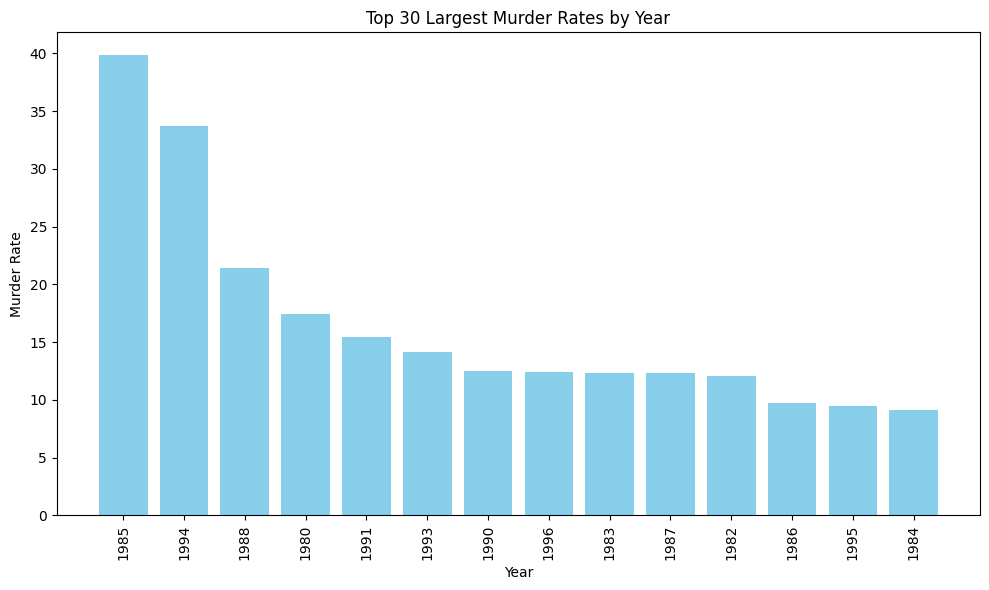

In [ ]:
print("Univariate Plots:")

# First 30 largest values and draw a bar chart
largest_values = data.nlargest(30, 'murdrate')[['year', 'murdrate']]
plt.figure(figsize=(10, 6))
plt.bar(largest_values['year'].astype(str), largest_values['murdrate'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 30 Largest Murder Rates by Year')
plt.xlabel('Year')
plt.ylabel('Murder Rate')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


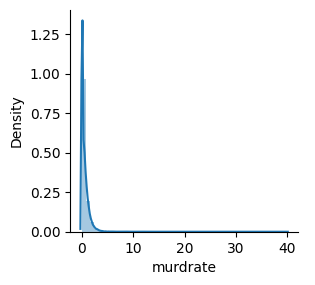

In [ ]:
# Distribution plot
sns.FacetGrid(data).map(sns.distplot,"murdrate").add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


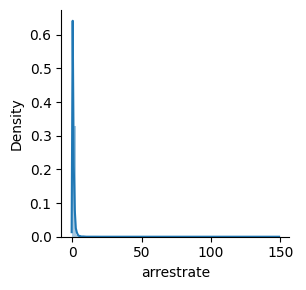

In [ ]:
sns.FacetGrid(data).map(sns.distplot,"arrestrate").add_legend()

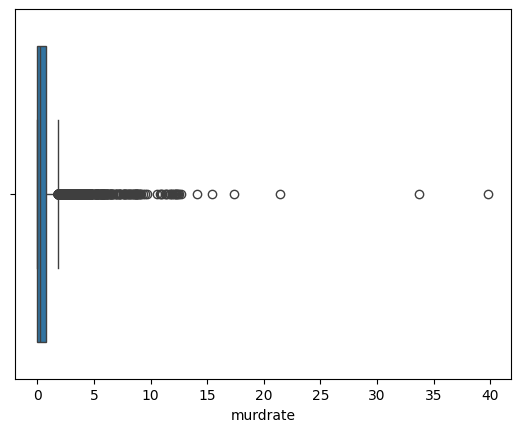

In [ ]:
sns.boxplot(x="murdrate",data=data)
plt.show()

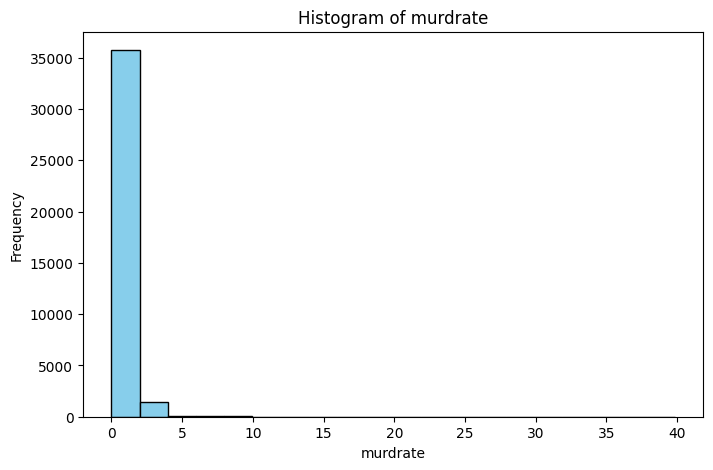

In [ ]:
column_name = 'murdrate'
plt.figure(figsize=(8, 5))
plt.hist(data[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

<ipython-input-35-a7e131bba22f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True, color='red')


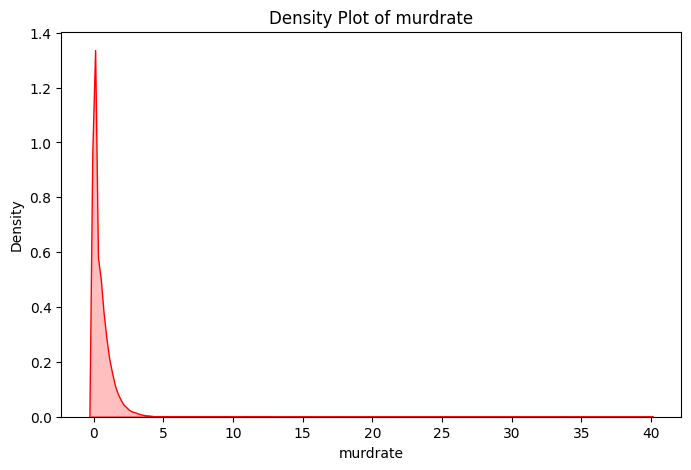

In [ ]:
column_name = 'murdrate'
plt.figure(figsize=(8, 5))
sns.kdeplot(data[column_name], shade=True, color='red')
plt.title('Density Plot of ' + column_name)
plt.xlabel(column_name)
plt.show()

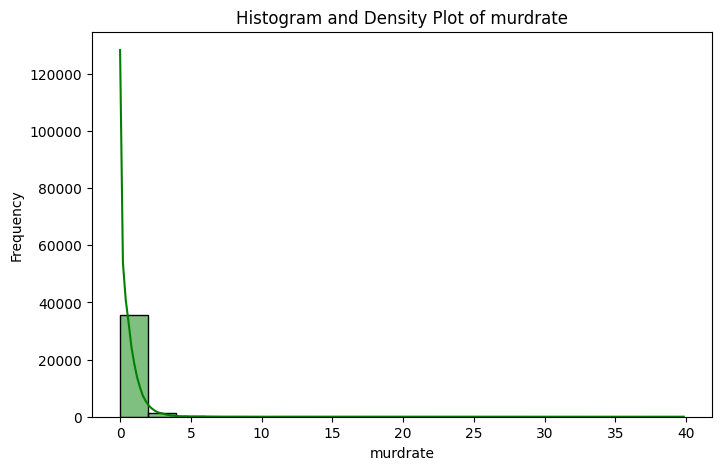

In [ ]:
column_name = 'murdrate'
plt.figure(figsize=(8, 5))
sns.histplot(data[column_name], kde=True, bins=20, color='green')
plt.title('Histogram and Density Plot of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

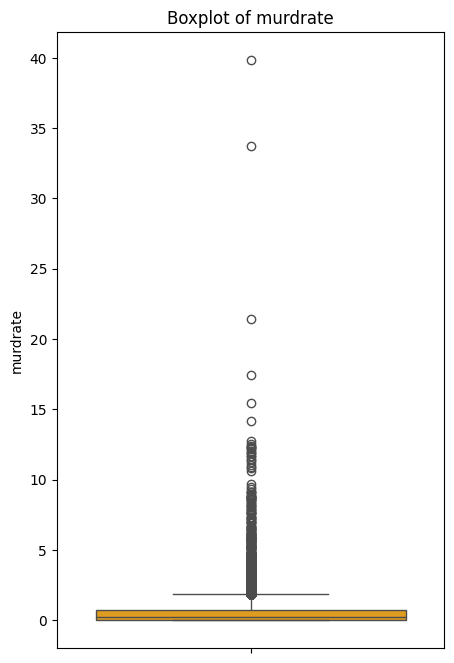

In [ ]:
column_name = 'murdrate'
plt.figure(figsize=(5, 8))
sns.boxplot(y=data[column_name], color='orange')
plt.title('Boxplot of ' + column_name)
plt.ylabel(column_name)
plt.show()

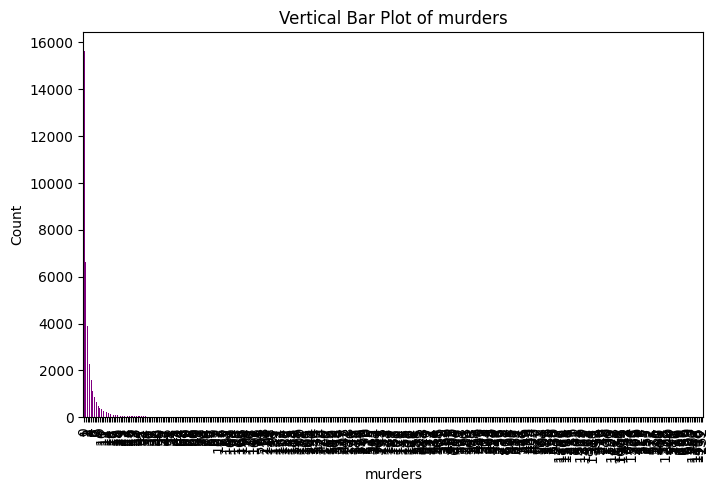

In [ ]:
column_name = 'murders'
plt.figure(figsize=(8, 5))
data[column_name].value_counts().plot(kind='bar', color='purple')
plt.title('Vertical Bar Plot of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()

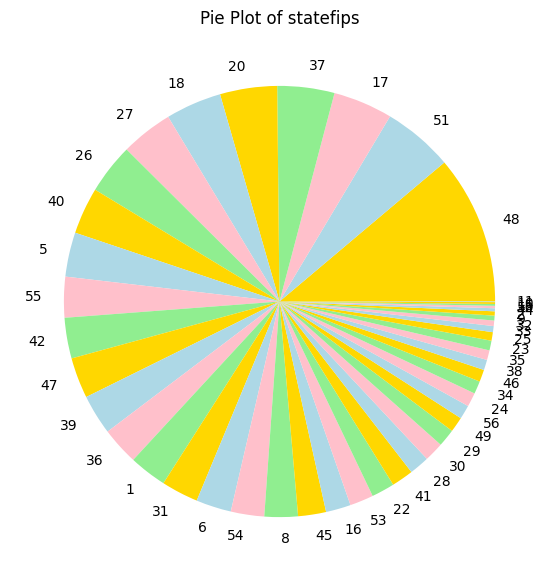

In [ ]:
column_name = 'statefips'
plt.figure(figsize=(7, 7))
data[column_name].value_counts().plot(kind='pie', colors=['gold', 'lightblue', 'pink', 'lightgreen'])
plt.title('Pie Plot of ' + column_name)
plt.ylabel('')
plt.show()

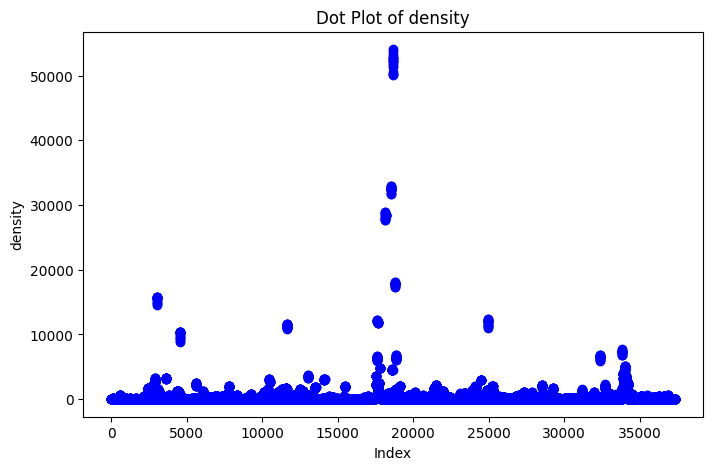

In [ ]:
column_name = 'density'
plt.figure(figsize=(8, 5))
plt.plot(data[column_name], 'o', color='blue')
plt.title('Dot Plot of ' + column_name)
plt.xlabel('Index')
plt.ylabel(column_name)
plt.show()



---



*05. Bivariate Analysis and Bivariate Plots*

Text(0, 0.5, 'murdrate')

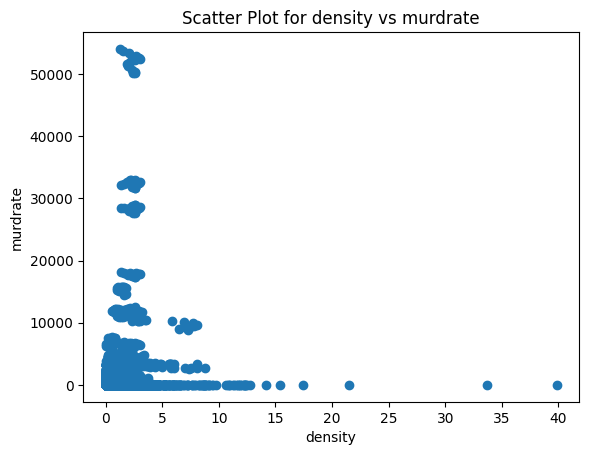

In [ ]:
plt.scatter(data["murdrate"], data["density"])
plt.title("Scatter Plot for density vs murdrate")
plt.xlabel("density")
plt.ylabel("murdrate")

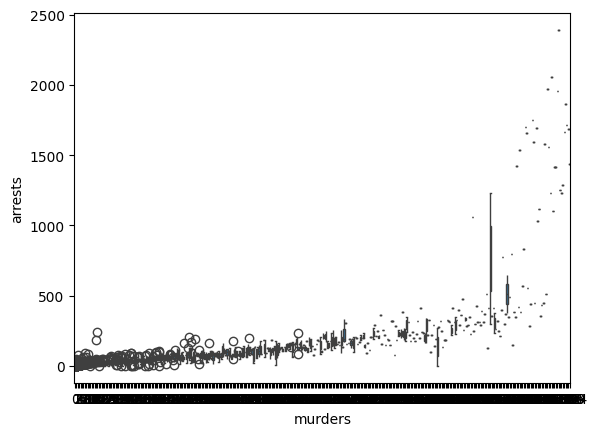

In [ ]:
sns.boxplot(x="murders",y="arrests",data=data)
plt.show()

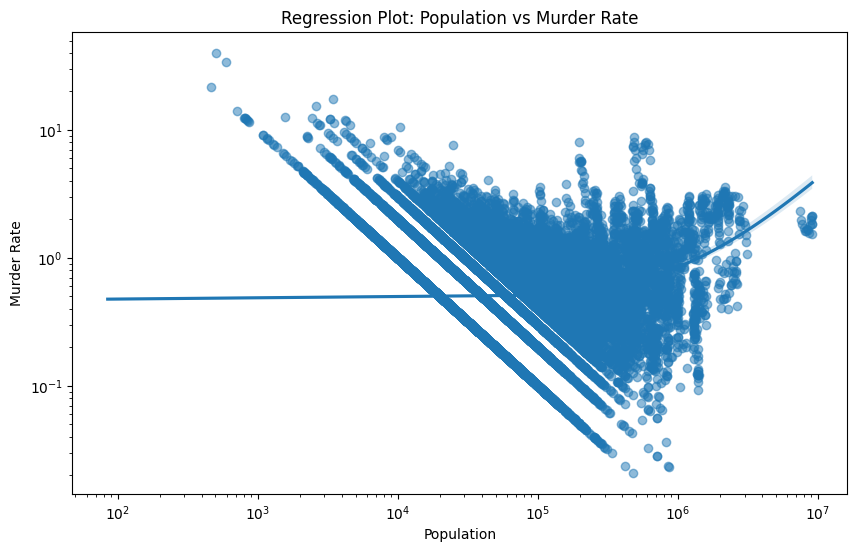

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='popul', y='murdrate', data=data, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Population vs Murder Rate')
plt.xlabel('Population')
plt.ylabel('Murder Rate')
plt.xscale('log')
plt.yscale('log')
plt.show()

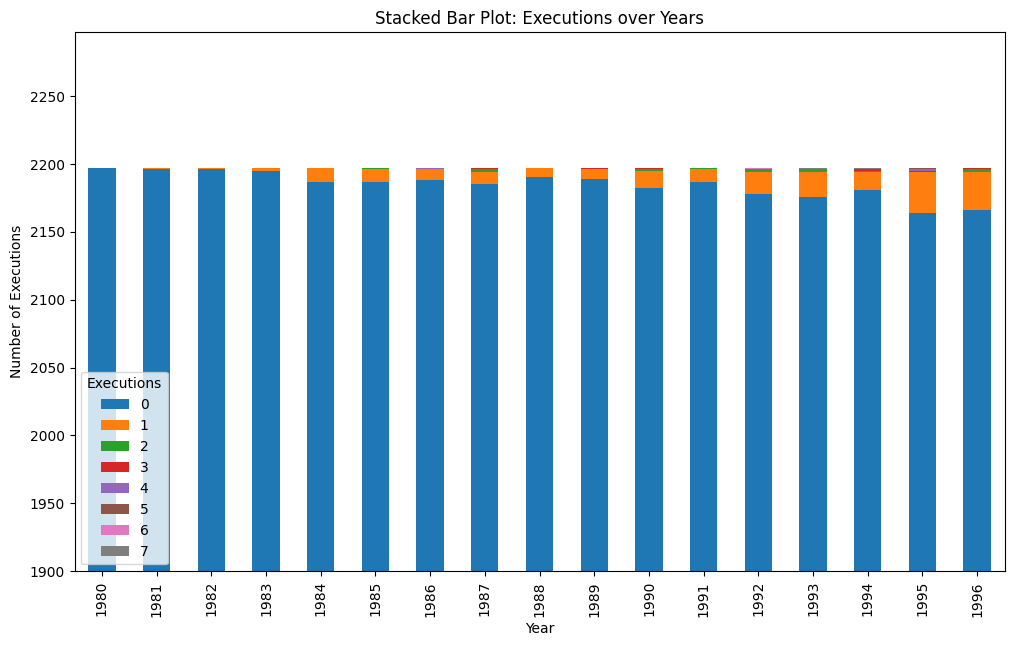

In [ ]:
exec_counts = data.groupby(['year', 'execs']).size().unstack(fill_value=0)
exec_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Bar Plot: Executions over Years')
plt.xlabel('Year')
plt.ylabel('Number of Executions')
plt.legend(title='Executions')
plt.ylim(1900, exec_counts.values.max() + 100)
plt.show()



---



*06. Multivariate Analysis and Multivariate Plots*

In [ ]:
corr = stats.pearsonr(data["murdrate"], data["density"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 2.941823910969753e-157
cor:		 0.13759418870061224


In [ ]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
rownames,1.000000,-0.042613,9.874345e-01,0.002649,-0.060608,0.039989,-0.005638,-0.013782,0.001813,-0.037363,...,-0.078843,4.543780e-04,-0.039936,0.030421,0.021541,9.871205e-01,2.707525e-01,0.020697,-0.046460,0.011430
arrests,-0.042613,1.000000,-4.606477e-02,0.311693,0.792039,-0.055317,0.097915,0.119305,-0.020348,0.143854,...,0.025419,1.588388e-03,0.906295,0.172154,0.154936,-4.613004e-02,-1.239912e-03,0.083742,0.297718,-0.000749
countyid,0.987434,-0.046065,1.000000e+00,0.010010,-0.061212,0.036127,-0.007710,-0.028573,-0.001444,-0.056774,...,-0.072340,3.461751e-13,-0.042459,0.013849,0.006024,9.999771e-01,2.318303e-01,0.018656,-0.037362,0.009194
density,0.002649,0.311693,1.000971e-02,1.000000,0.380315,-0.135204,0.126121,0.129959,-0.020912,0.164865,...,0.034143,3.468035e-03,0.433851,0.137594,0.061293,9.837386e-03,2.703860e-02,0.022459,0.280124,-0.000814
popul,-0.060608,0.792039,-6.121241e-02,0.380315,1.000000,-0.119220,0.185030,0.084739,-0.013728,0.099992,...,0.044673,1.499733e-02,0.877110,0.118712,0.064519,-6.096488e-02,-4.954060e-02,0.160758,0.557064,-0.003113
perc1019,0.039989,-0.055317,3.612727e-02,-0.135204,-0.119220,1.000000,0.256169,0.122132,-0.208278,0.098434,...,0.066431,-3.826454e-01,-0.073315,0.046229,0.036857,3.596605e-02,3.141287e-02,-0.019806,-0.078025,-0.011402
perc2029,-0.005638,0.097915,-7.710277e-03,0.126121,0.185030,0.256169,1.000000,0.174507,-0.223615,-0.146472,...,0.032846,-4.282845e-01,0.117278,0.074479,0.042230,-8.012452e-03,4.163893e-02,0.026597,0.424437,-0.011871
percblack,-0.013782,0.119305,-2.857313e-02,0.129959,0.084739,0.122132,0.174507,1.000000,-0.104799,0.391590,...,-0.129342,1.190266e-02,0.139215,0.312546,0.227672,-2.916773e-02,7.887198e-02,0.047100,0.148421,0.020806
percmale,0.001813,-0.020348,-1.443695e-03,-0.020912,-0.013728,-0.208278,-0.223615,-0.104799,1.000000,0.113756,...,-0.088569,6.603317e-01,-0.025080,-0.064556,-0.037630,-1.293116e-03,-2.195738e-02,0.028234,-0.082901,0.029087
rpcincmaint,-0.037363,0.143854,-5.677418e-02,0.164865,0.099992,0.098434,-0.146472,0.391590,0.113756,1.000000,...,0.189517,2.453886e-01,0.157738,0.199870,0.152835,-5.667931e-02,-2.659639e-02,0.005941,0.056256,0.007829


In [ ]:
correlation_matrix = data[['arrests', 'murders', 'murdrate', 'arrestrate', 'popul', 'density']].corr()
print(correlation_matrix)

             arrests   murders  murdrate  arrestrate     popul   density
arrests     1.000000  0.906295  0.172154    0.154936  0.792039  0.311693
murders     0.906295  1.000000  0.212655    0.119888  0.877110  0.433851
murdrate    0.172154  0.212655  1.000000    0.452700  0.118712  0.137594
arrestrate  0.154936  0.119888  0.452700    1.000000  0.064519  0.061293
popul       0.792039  0.877110  0.118712    0.064519  1.000000  0.380315
density     0.311693  0.433851  0.137594    0.061293  0.380315  1.000000


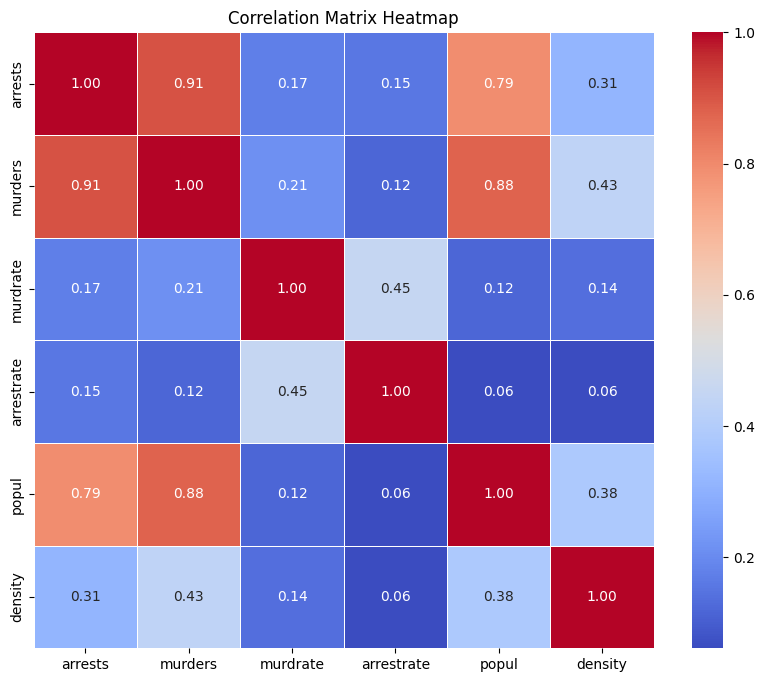

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



---



*07. Time Series Analysis*

In [ ]:
# Random numpy generated time series

zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([ 0.29857326, -0.56664415,  1.05342611, -0.10906251, -0.35658537,
        0.06010661, -2.1821668 , -0.38631632, -0.24811277,  0.03992991,
       -0.02589029,  0.49725589, -1.28195198,  0.59490592, -0.13579373,
        0.32474898, -0.50190773,  0.03164328,  0.76481142, -1.28262489,
       -1.26014935, -0.39655256,  1.33245743, -0.31704382,  0.33690695,
        0.82978801,  0.13920876,  0.42896379, -0.22511674,  0.397654  ,
        0.59377156, -0.43724238, -0.51258537,  1.38027489,  2.06411692,
       -1.417528  , -1.76928996, -0.02379746,  1.12114983, -0.35238367,
        0.45834975, -0.17240054, -0.30680773,  0.01634078,  0.83595439,
        1.31713887,  0.88268645,  0.71888272, -0.27960193, -0.75787523])

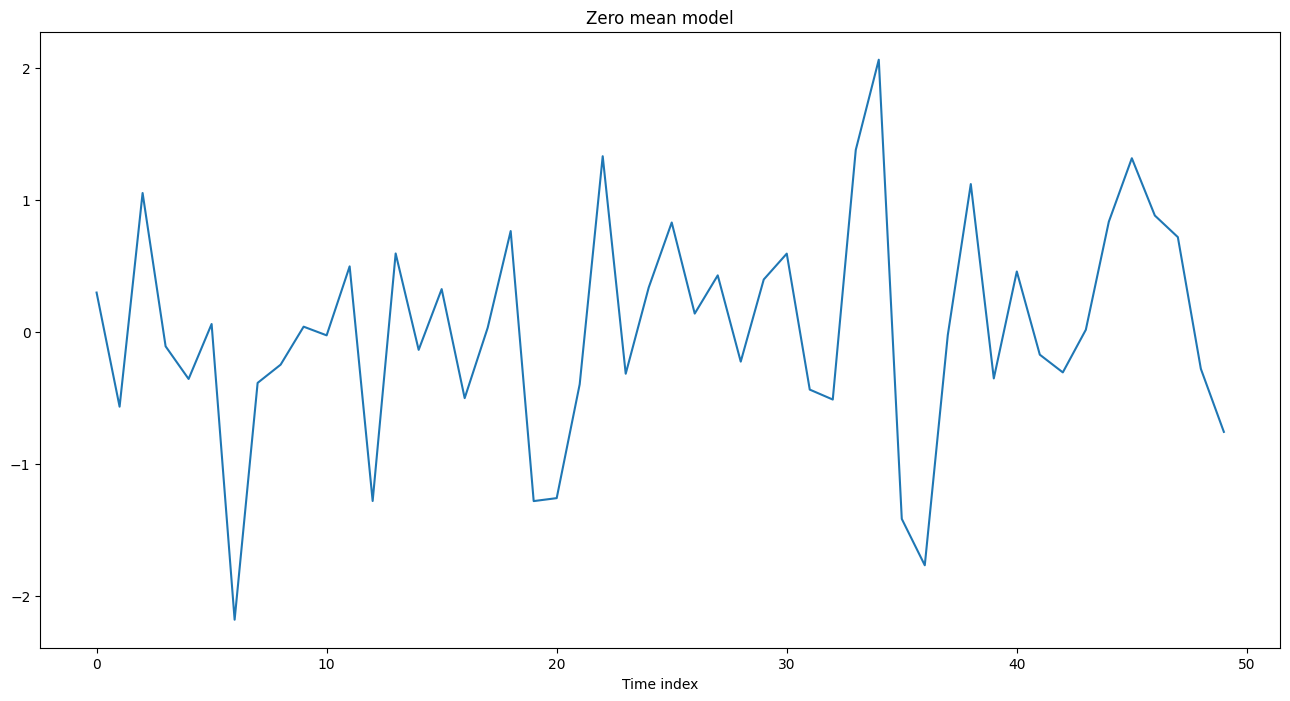

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [ ]:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([ 0.29857326, -0.26807089,  0.78535523,  0.67629272,  0.31970735,
        0.37981396, -1.80235283, -2.18866916, -2.43678193, -2.39685202,
       -2.42274231, -1.92548641, -3.2074384 , -2.61253248, -2.74832621,
       -2.42357723, -2.92548497, -2.89384169, -2.12903027, -3.41165516,
       -4.67180451, -5.06835707, -3.73589964, -4.05294345, -3.7160365 ,
       -2.88624849, -2.74703973, -2.31807594, -2.54319268, -2.14553868,
       -1.55176712, -1.98900949, -2.50159487, -1.12131998,  0.94279694,
       -0.47473106, -2.24402102, -2.26781848, -1.14666865, -1.49905232,
       -1.04070257, -1.21310311, -1.51991084, -1.50357007, -0.66761568,
        0.64952319,  1.53220964,  2.25109236,  1.97149042,  1.21361519])

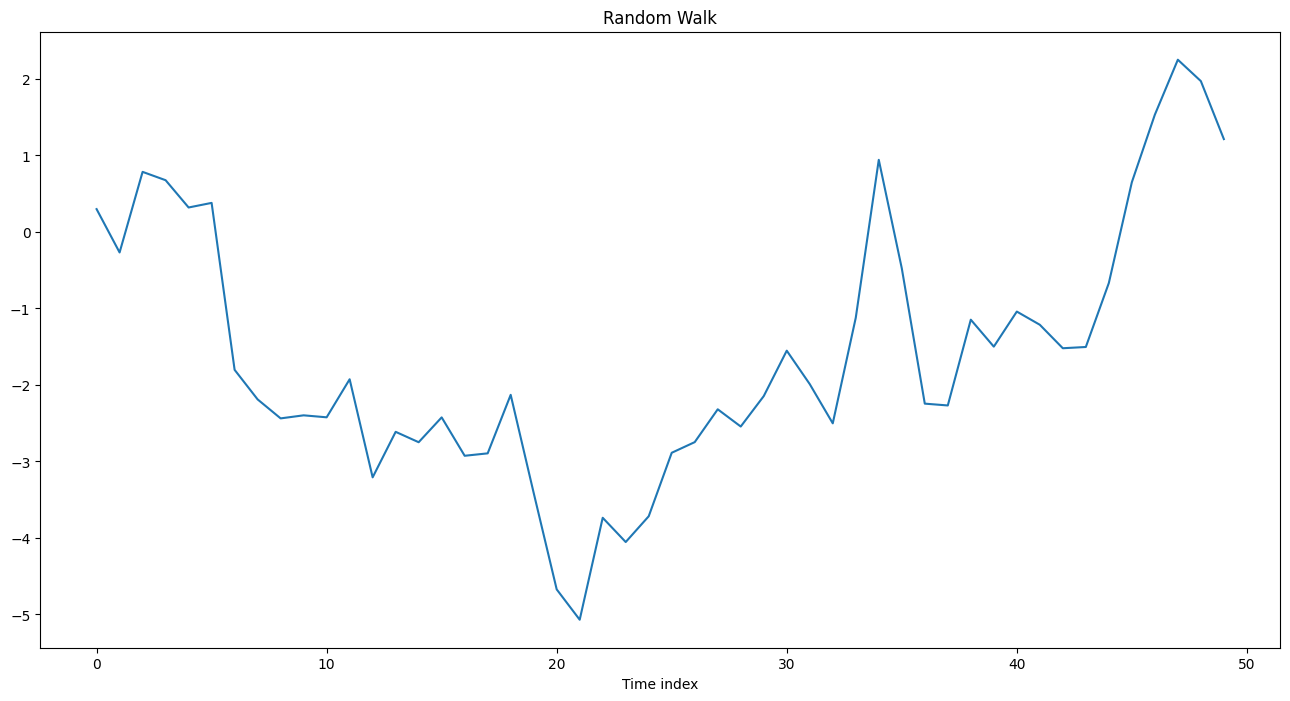

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

Time Series Analysis with data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/countymurders.csv')
df.columns

Index(['rownames', 'arrests', 'countyid', 'density', 'popul', 'perc1019',
       'perc2029', 'percblack', 'percmale', 'rpcincmaint', 'rpcpersinc',
       'rpcunemins', 'year', 'murders', 'murdrate', 'arrestrate', 'statefips',
       'countyfips', 'execs', 'lpopul', 'execrate'],
      dtype='object')

In [ ]:
# Data Cleaning
df.shape

(37349, 21)

In [ ]:
df.tail(10)

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
37339,37340,0.0,56045,3.030000,7254,15.56000,12.310000,0.070000,41.01000,73.040,...,66.880,1987,0,0.0,0.00000,56,45,0,8.889308,0.0
37340,37341,0.0,56045,2.850000,6842,15.54000,11.590000,0.060000,41.26000,82.910,...,44.840,1988,0,0.0,0.00000,56,45,0,8.830835,0.0
37341,37342,0.0,56045,2.780000,6676,15.69000,10.950000,0.060000,41.65000,83.120,...,42.770,1989,0,0.0,0.00000,56,45,0,8.806274,0.0
37342,37343,0.0,56045,2.750000,6591,15.93000,10.730000,0.060000,42.01000,76.600,...,34.470,1990,0,0.0,0.00000,56,45,0,8.793460,0.0
37343,37344,0.0,56045,2.710000,6507,16.15000,10.480000,0.060000,42.35000,86.610,...,41.100,1991,0,0.0,0.00000,56,45,0,8.780634,0.0
37344,37345,0.0,56045,2.680000,6430,16.35000,10.260000,0.060000,42.67000,95.540,...,54.190,1992,0,0.0,0.00000,56,45,0,8.768730,0.0
37345,37346,1.0,56045,2.708031,6493,16.67950,9.610350,0.077006,50.13091,107.260,...,42.904,1993,0,0.0,1.54012,56,45,0,8.778480,0.0
37346,37347,0.0,56045,2.736391,6561,16.79622,9.510745,0.030483,50.16004,98.550,...,39.150,1994,0,0.0,0.00000,56,45,0,8.788898,0.0
37347,37348,0.0,56045,2.730135,6546,17.01803,9.563092,0.076383,50.18332,106.928,...,38.048,1995,0,0.0,0.00000,56,45,0,8.786610,0.0
37348,37349,0.0,56045,2.733472,6554,16.90571,9.642966,0.076289,50.13732,116.116,...,40.194,1996,0,0.0,0.00000,56,45,0,8.787830,0.0


In [ ]:
df.dtypes

,0
rownames,int64
arrests,float64
countyid,int64
density,float64
popul,int64
perc1019,float64
perc2029,float64
percblack,float64
percmale,float64
rpcincmaint,float64


In [ ]:
df.index = pd.to_datetime(df['year'], format='%Y')
df.head(3)

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,1,2.0,1001,54.05,32216,20.63,15.28,22.33,40.25,167.67,...,29.16,1980,2,0.620810,0.620810,1,1,0,10.38022,0.0
1981-01-01,2,3.0,1001,53.66,31984,20.19,15.55,22.07,40.36,167.99,...,43.92,1981,1,0.312656,0.937969,1,1,0,10.37299,0.0
1982-01-01,3,2.0,1001,53.75,32036,19.66,15.73,21.80,40.42,166.63,...,71.41,1982,3,0.936446,0.624298,1,1,0,10.37462,0.0


In [ ]:
df.index

DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01',
               ...
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01'],
              dtype='datetime64[ns]', name='year', length=37349, freq=None)

In [ ]:
df['Year'] = df.index.year

In [ ]:
df.sample(5, random_state=0)

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate,Year
year,,,,,,,,,,,,,,,,,,,,,
1984-01-01,5020,0.0,16051,14.79,16192,18.73,14.35,0.06,38.38,49.01,...,1984,0,0.000000,0.000000,16,51,0,9.692272,0.0,1984
1986-01-01,28006,4.0,48049,36.72,34656,15.71,14.72,4.62,40.70,103.17,...,1986,3,0.865651,1.154201,48,49,0,10.453230,0.0,1986
1990-01-01,1524,8.0,5041,21.99,16820,17.36,13.29,42.87,38.07,293.38,...,1990,3,1.783591,4.756243,5,41,0,9.730324,0.0,1990
1983-01-01,3166,9.0,6089,32.44,122800,15.77,15.32,0.67,41.32,344.03,...,1983,8,0.651466,0.732899,6,89,0,11.718310,0.0,1983
1990-01-01,1949,4.0,5091,61.98,38680,15.98,14.41,22.76,39.87,193.80,...,1990,3,0.775595,1.034126,5,91,0,10.563080,0.0,1990


In [ ]:
# Time-based indexing
df.loc['1980']

,rownames,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,...,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate,Year
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,1,2.0,1001,54.05,32216,20.63,15.28,22.33,40.25,167.67,...,1980,2,0.620810,0.620810,1,1,0,10.380220,0.0,1980
1980-01-01,18,4.0,1003,49.45,78944,17.98,14.95,15.22,40.55,132.43,...,1980,4,0.506688,0.506688,1,3,0,11.276490,0.0,1980
1980-01-01,35,2.0,1005,27.95,24736,19.13,14.10,44.36,38.44,304.96,...,1980,2,0.808538,0.808538,1,5,0,10.116010,0.0,1980
1980-01-01,52,2.0,1009,56.59,36536,17.88,14.94,1.64,41.83,145.80,...,1980,4,1.094811,0.547405,1,9,0,10.506050,0.0,1980
1980-01-01,69,1.0,1011,16.96,10600,19.14,14.58,67.65,37.59,443.47,...,1980,1,0.943396,0.943396,1,11,0,9.268609,0.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980-01-01,37265,9.0,56037,4.05,42272,16.11,23.31,0.77,41.89,32.80,...,1980,7,1.655942,2.129069,56,37,0,10.651880,0.0,1980
1980-01-01,37282,0.0,56039,2.37,9494,13.92,27.82,0.04,45.32,27.94,...,1980,0,0.000000,0.000000,56,39,0,9.158415,0.0,1980
1980-01-01,37299,0.0,56041,6.57,13684,16.74,22.08,0.13,40.81,30.38,...,1980,0,0.000000,0.000000,56,41,0,9.523983,0.0,1980


<Axes: xlabel='year', ylabel='murders'>

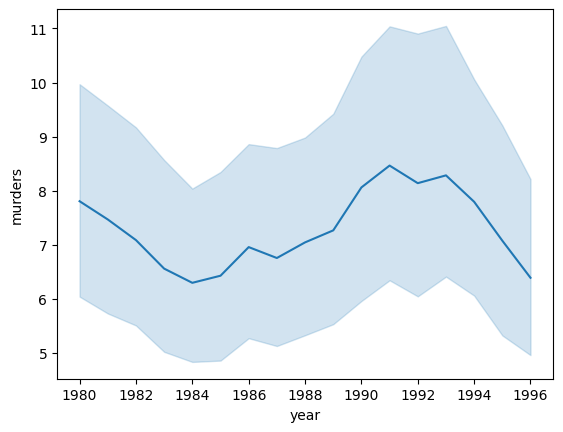

In [ ]:
# Visualising time series
sns.lineplot(data=df['murders'])

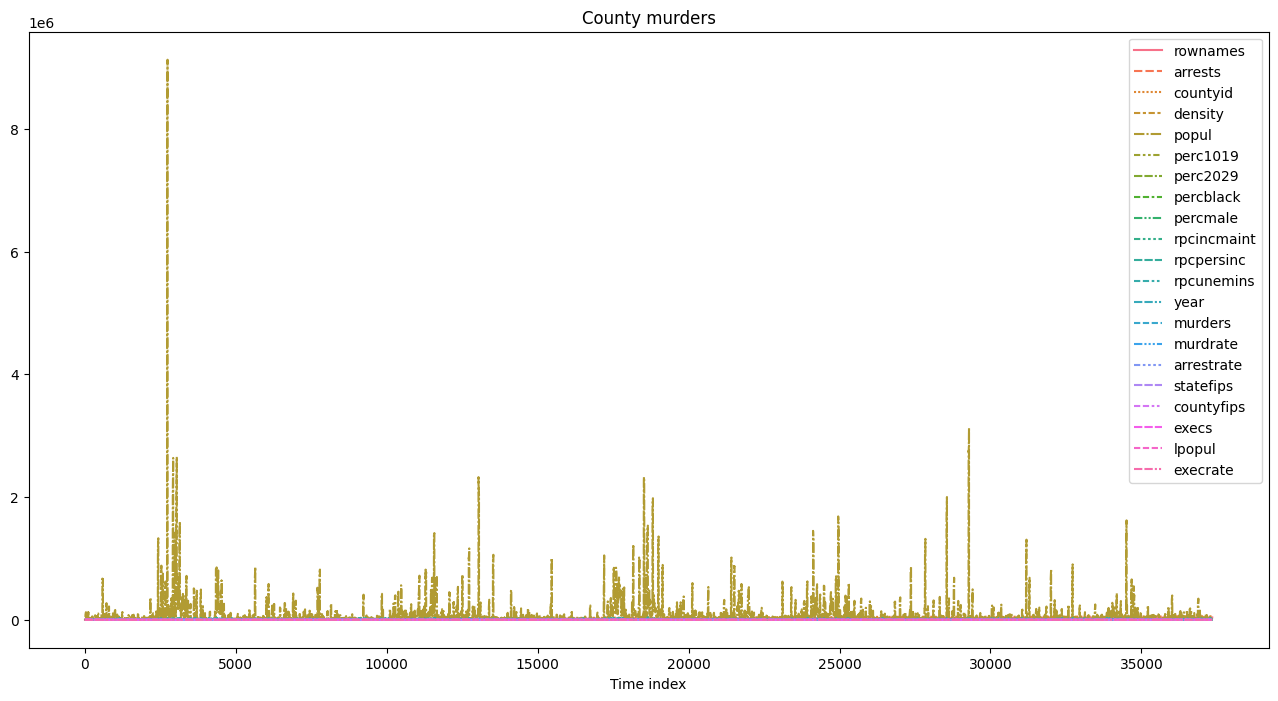

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=data)
g.set_title('County murders')
g.set_xlabel('Time index')
plt.show()

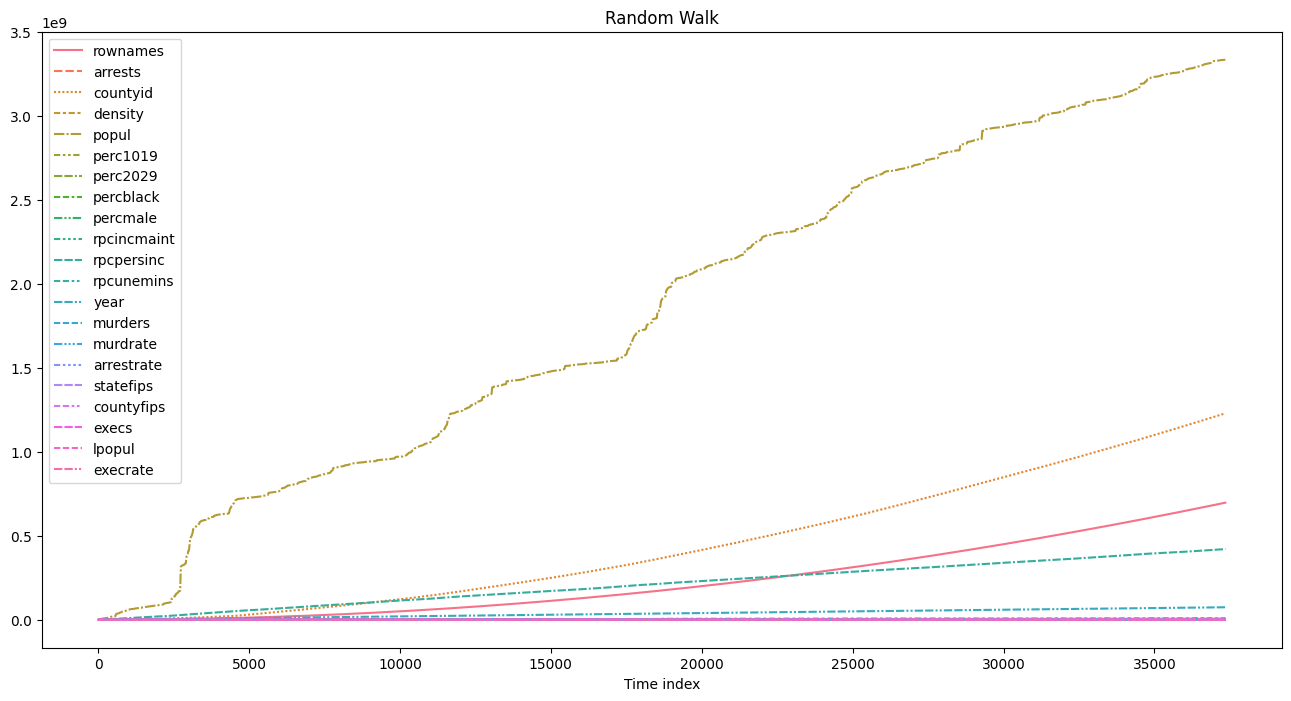

In [ ]:
random_walk = np.cumsum(data)
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

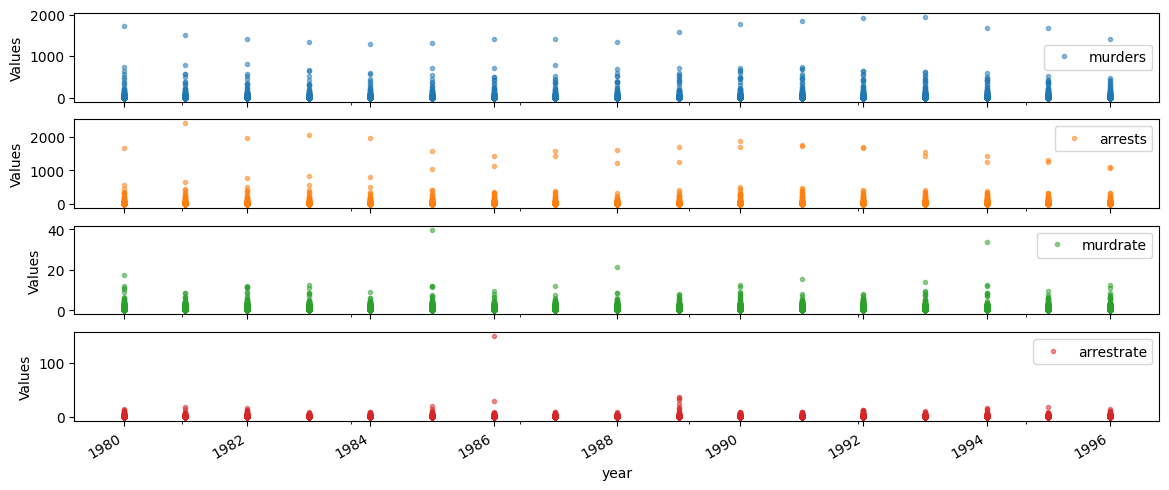

In [ ]:
cols_to_plot = ['murders', 'arrests','murdrate','arrestrate']
axes = df[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('Values')

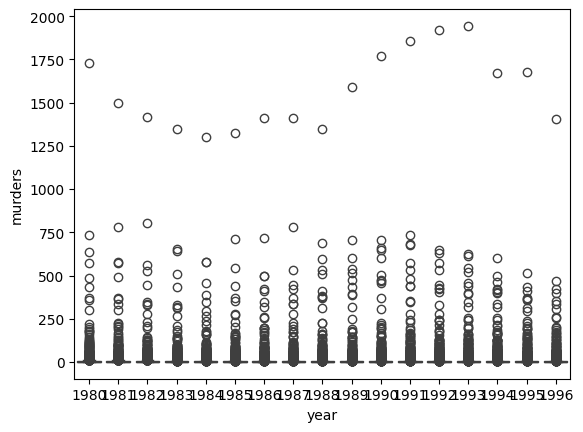

In [ ]:
sns.boxplot(data=df, x='year', y='murders');

In [ ]:
columns = ['murders', 'arrests','murdrate','arrestrate']
power_weekly_mean = df[columns].resample('W').mean()
power_weekly_mean

,murders,arrests,murdrate,arrestrate
year,,,,
1980-01-06,7.805644,6.958554,0.626795,0.606671
1980-01-13,NaN,NaN,NaN,NaN
1980-01-20,NaN,NaN,NaN,NaN
1980-01-27,NaN,NaN,NaN,NaN
1980-02-03,NaN,NaN,NaN,NaN
...,...,...,...,...
1995-12-10,NaN,NaN,NaN,NaN
1995-12-17,NaN,NaN,NaN,NaN
1995-12-24,NaN,NaN,NaN,NaN




---



*08. Clustering using the elbow method to find the optimal number of clusters*

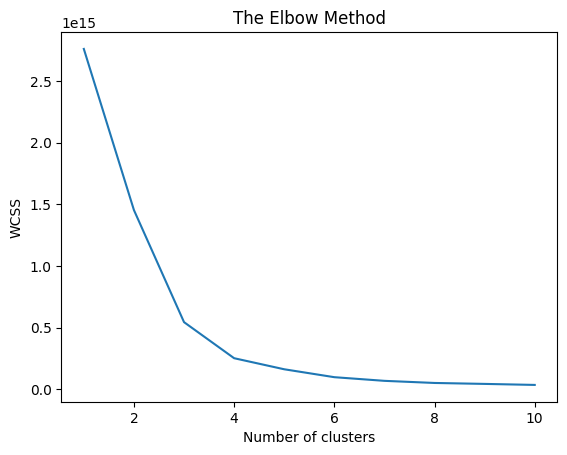

In [ ]:
X = data.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

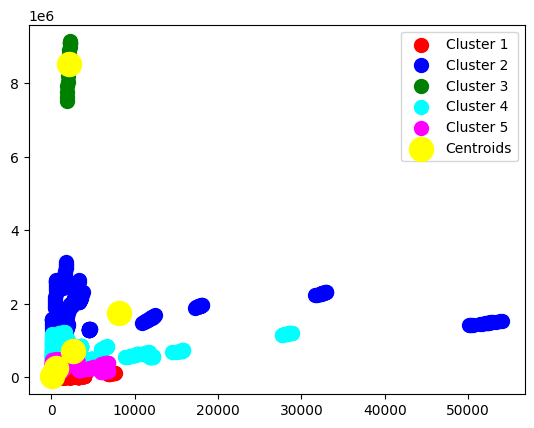

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

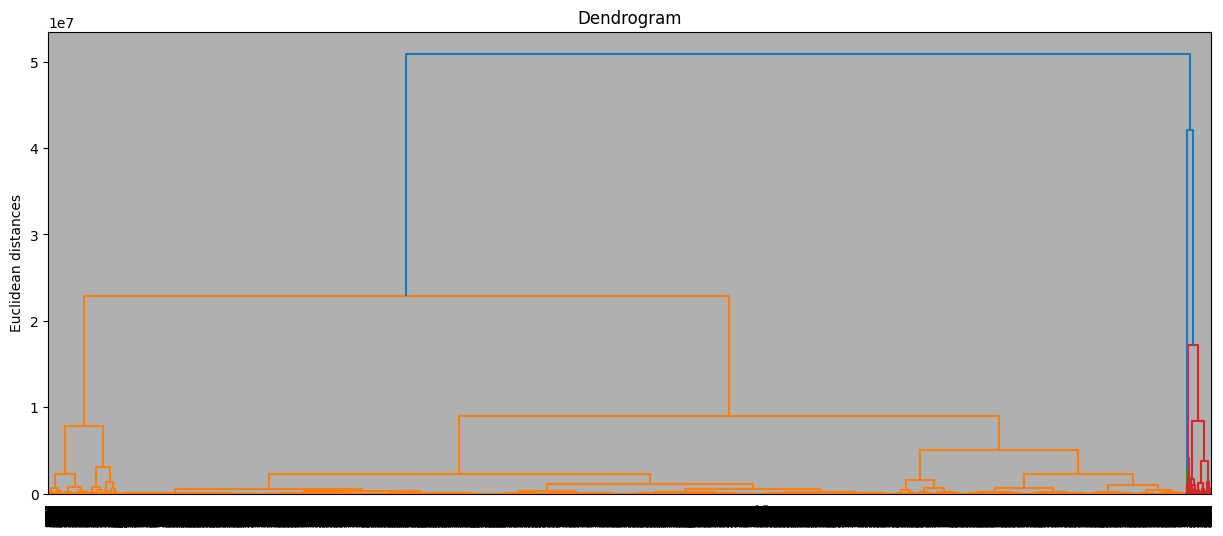

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()



---



*09. Principle Component Analysis (PCA)*

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(scaled_data)

pca = PCA()
pca_data = pca.fit_transform(imputed_data)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0.614758,-3.122712,-3.078455,0.472551,0.478647,0.005268,-0.502890,-1.151403,-0.463816,-0.682639,...,0.407470,-0.151708,1.017725,0.695991,-0.088341,-0.564448,-0.216644,0.048609,0.270060,-1.802106e-15
1,0.589239,-3.167683,-2.976573,0.484507,0.339284,0.133467,-0.401779,-1.055300,-0.464385,-0.563777,...,0.279410,-0.536256,0.703421,0.656587,-0.263879,-0.420977,-0.138581,0.020863,0.275052,-1.802690e-15
2,0.738994,-3.147544,-2.902586,0.627375,0.245496,0.125995,-0.173072,-0.604186,-0.386992,-0.389386,...,0.337721,0.202237,0.620184,0.571901,-0.379289,-0.208587,-0.068134,-0.000154,0.275546,-1.802558e-15
3,1.220344,-2.877084,-3.047488,1.650938,0.628799,-0.605238,-0.238392,0.592628,-0.860929,-0.255602,...,0.373761,0.392256,0.648095,0.260971,-0.379732,-0.053067,-0.025178,-0.022419,0.259831,-1.802508e-15
4,0.784639,-3.141493,-2.256263,0.617191,0.509592,-0.202316,-0.262877,-0.763729,-0.397381,-0.679328,...,0.195394,-0.255835,0.424248,0.317706,-0.252806,-0.068136,-0.052742,0.005003,0.274919,-1.802327e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,-1.786385,2.016291,1.446091,-0.596399,-0.548963,0.397179,-0.654511,0.279470,-0.198320,-0.858575,...,0.242845,-0.072170,0.713906,0.972004,0.373034,0.743341,0.181251,-0.017149,0.244560,-2.215402e-15
37345,-1.677649,2.068054,2.334259,0.394967,-0.439847,0.152877,-0.549585,0.380837,-1.269662,-0.085436,...,0.322184,-0.693328,0.314800,1.295378,0.314768,-0.134523,0.028637,0.057082,0.226510,-2.214615e-15
37346,-1.872899,1.963950,2.519151,0.051176,-0.626950,0.516265,-0.535680,-0.299114,-0.991717,-0.224270,...,0.440076,0.103836,0.412454,1.147394,0.111828,-0.016865,0.022113,0.009129,0.239985,-2.213774e-15
37347,-1.865660,1.966336,2.577000,0.158775,-0.651218,0.543143,-0.489920,-0.391340,-1.038093,-0.189599,...,0.449493,0.082878,0.505110,1.136903,0.123766,0.127143,0.056707,0.001546,0.240018,-2.213959e-15


In [ ]:
explained_variance = pca.explained_variance_ratio_

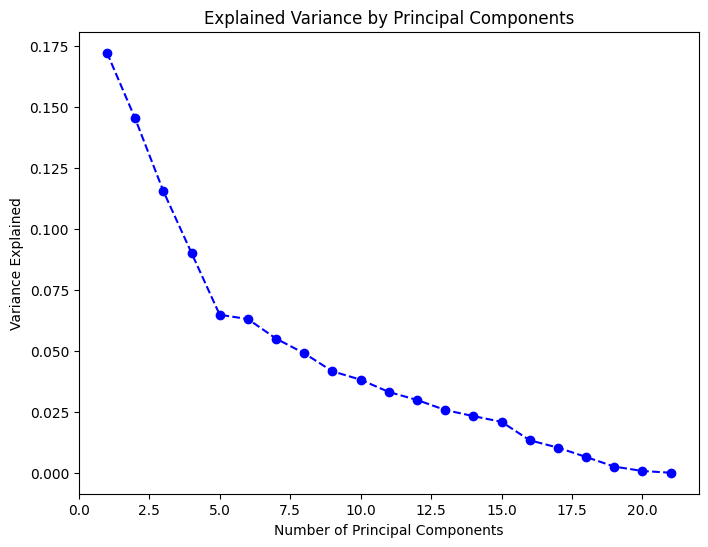

In [ ]:
# Plotting the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()

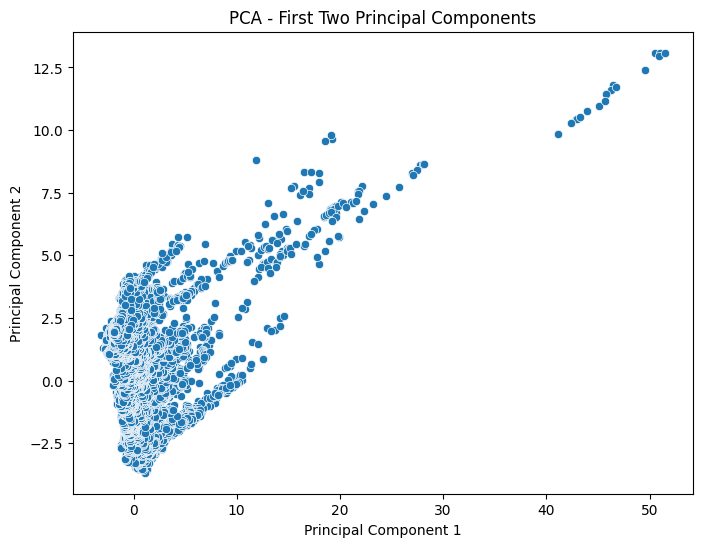

In [ ]:
# Visualize the first two principal components for a 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



---



*10. Model Evaluation*

In [ ]:
print(df.keys())

Index(['rownames', 'arrests', 'countyid', 'density', 'popul', 'perc1019',
       'perc2029', 'percblack', 'percmale', 'rpcincmaint', 'rpcpersinc',
       'rpcunemins', 'year', 'murders', 'murdrate', 'arrestrate', 'statefips',
       'countyfips', 'execs', 'lpopul', 'execrate', 'Year'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['rownames', 'arrests', 'countyid', 'density', 'popul', 'perc1019',
       'perc2029', 'percblack', 'percmale', 'rpcincmaint', 'rpcpersinc',
       'rpcunemins', 'year', 'murders', 'murdrate', 'arrestrate', 'statefips',
       'countyfips', 'execs', 'lpopul', 'execrate', 'Year'],
      dtype='object')


<Axes: >

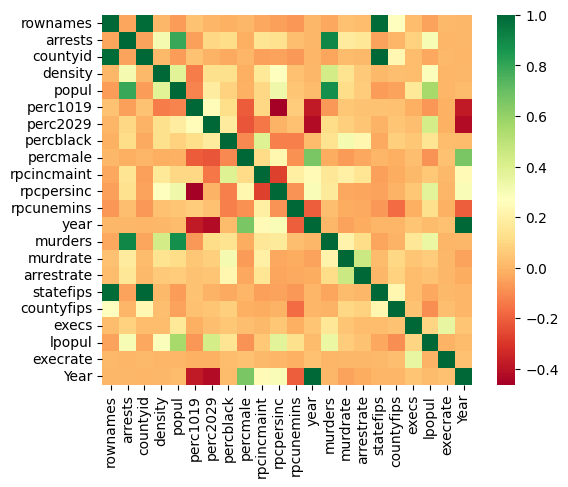

In [ ]:
#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

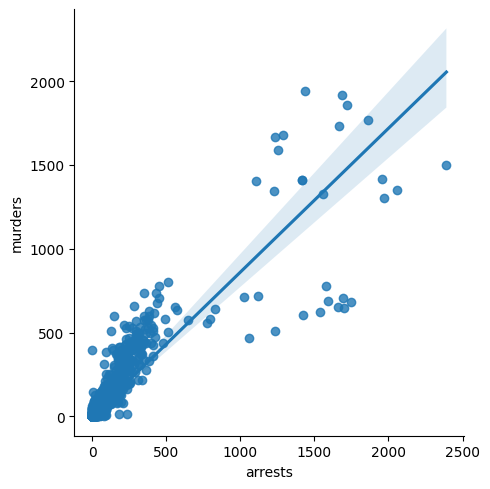

In [ ]:
#We can use the lmplot 6. method from seaborn to see the relationship between RM and MEDV. Check out the following snippet:
sns.lmplot(x = 'arrests', y = 'murders', data = df)

In [ ]:
# Preparing the data
X = df[['arrests']]
y = df[['murders']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test, y_test)

0.8151310666464185

In [ ]:
# predict the y values
y_pred=regressor.predict(X_test)

In [ ]:
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,3,4.179522
1,0,1.772622
2,0,1.772622
3,0,4.981822
4,0,1.772622
5,2,14.609421
6,0,1.772622
7,1,7.472919
8,0,1.772622
9,1,1.772622


<Axes: >

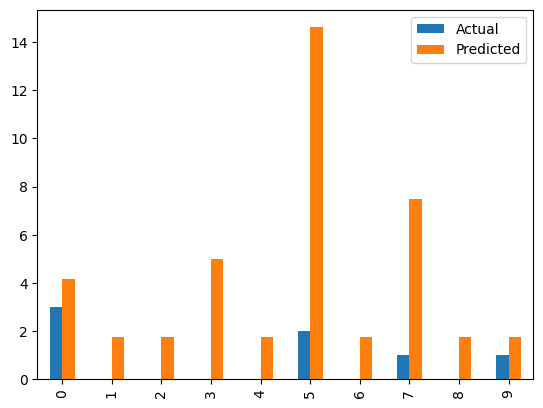

In [ ]:
evaluate.head(10).plot(kind = 'bar')

In [ ]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")
# Root Mean Squared Error (RMSE)
print(f"RMSE score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2 score: 0.8151310666464185
MAE score: 3.6808300891230057
MSE score: 369.9575582618915
RMSE score: 19.234280809582966
